# CHAPTER 4 - Scalar Diffraction and Propagation Solutions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, fft, ifft, ifftshift


# Define the rect function
def rect(x):
    return np.where(np.abs(x) <= 0.5, 1, 0)

def comb(x):
    # Dirac delta approximation: 1 where x is an integer, 0 otherwise
    return np.where(np.abs(x - np.round(x)) < 3e-2, 1, 0)

def circ_(x, y, r):
    return np.where(np.sqrt(x**2 + y**2) <= r, 1, 0)

def sinc(x):
    return np.where(x == 0, 1, np.sin(x) / x)

def triangle(x):
    return np.where(np.abs(x) <= 1, 1 - np.abs(x), 0)

def gauss(x):
    return np.exp(-x**2)

def circ(r):
    return lambda x, y: np.where(np.sqrt(x**2 + y**2) <= r, 1, 0)



In [ ]:
from scipy.special import jv

def jinc(x):
  mask = ( x!=0 )
  out = np.pi * np.ones(np.shape(x))
  out[mask] = jv(1, 2*np.pi*x[mask]) / (x[mask])
  return out

## Fraunhofer Irradiance

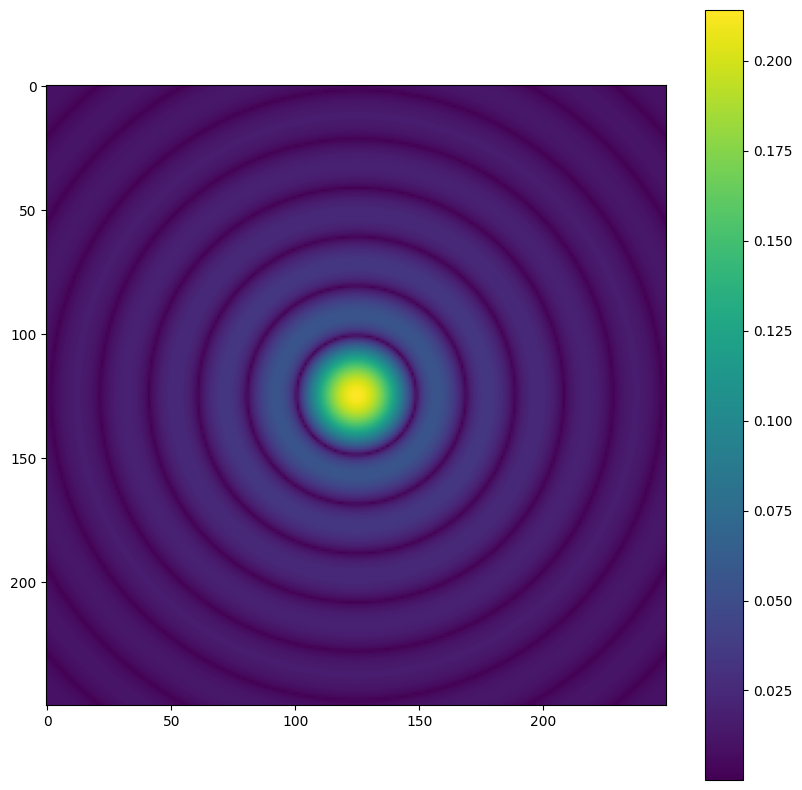

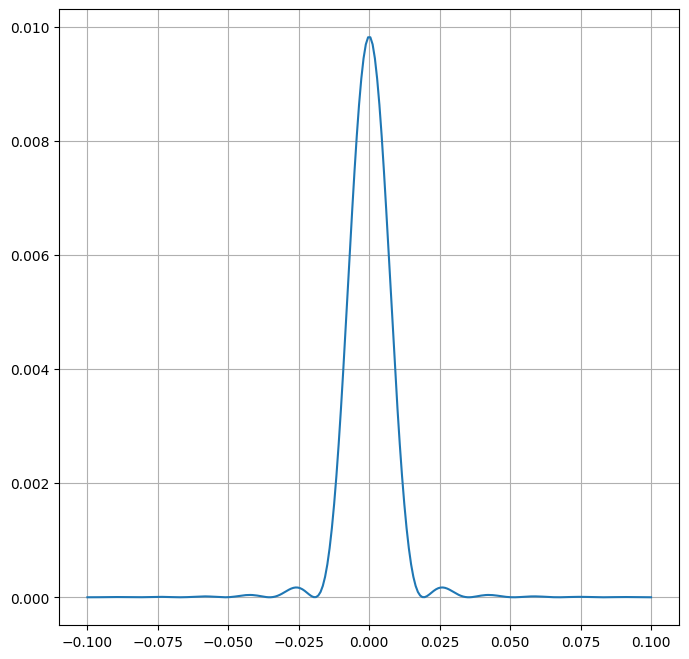

In [ ]:
L = 0.2
M = 250
dx = L/M
x = np.linspace(-L/2, L/2, M)
y = x
X, Y = np.meshgrid(x, y)

w = 1e-3
lambda_ = 0.633e-6
z = 50
k = 2*np.pi/lambda_
lz = lambda_ * z

I2 = ((w**2 / lz)**2) * (jinc(w/lz * np.sqrt(X**2 + Y**2)))**2

plt.figure(figsize=(10, 10))
plt.imshow(I2**(1/3))
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(x, I2[int(M/2), :])
plt.grid(True)
plt.show()


### P 4.1
Consider a plane wave of wavelength $\lambda$ incident on two pieces of glass of different thicknesses and refractive indices as shown in Fig. 4.4.

 [ ... n1,d1 ... ]

 [ ... n2,d2 ........]

a' .................... b'

d2>d1

d2 = b'-a'

Find an expression for the optical path (length) difference (OPD) for the two parts of the beam between planes a and b.

--------------------------------------------

OPD = n*d

@ d1 (upper) OPD1 = n1*d1
@ d2 (lower) OPD2 = n2*d2

then,
OPD = OPD1 - OPD2 = n1*d1 - n2*d2